# **Internship on Data Science and Analytics**

#**Credit Score Classification Model Development**

####**Import Packages and Modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###**Load Dataset**

In [2]:
data=pd.read_csv("/content/credit.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
#Dimensions of the dataset

data.shape

(100000, 28)

In [4]:
# To get the basic info like list of features ,non null count ,datatype of the features

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
#To get basic statical summary of the numerical columns of the dataset.

data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


**There are 21 numeric columns in the datset and their basic statistical summary is shown in the above output.**

In [6]:
# To get basic summary of the categorical columns in the datset.

data.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


**There are 7 character type features in the dataset and their count ,unique number of observations, the most ferquently occuring value and its corresponding count is listed as 'top' and 'freq' respectively.**

##**Exploratory Data Analysis (EDA)**

####**Count Plot for different Categorical Features**

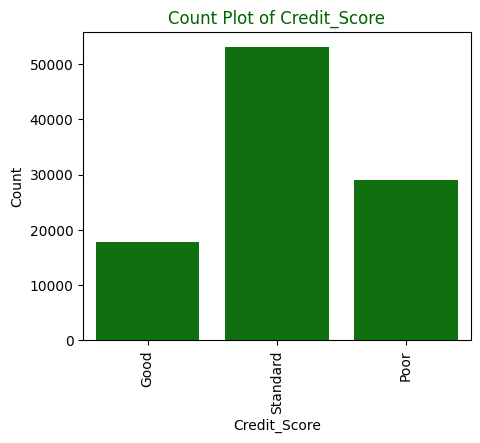

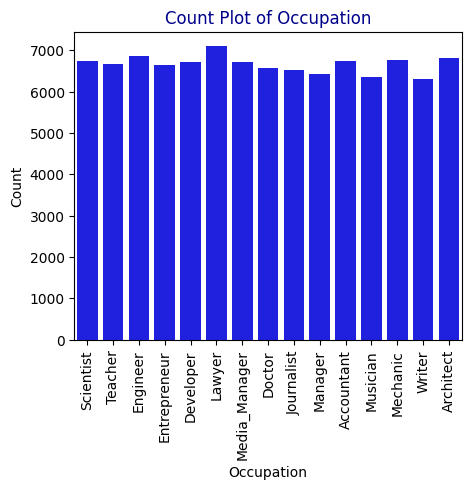

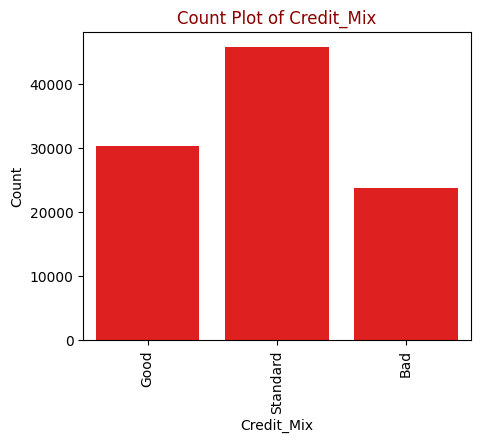

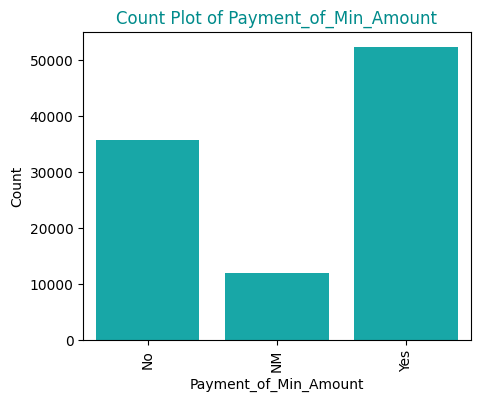

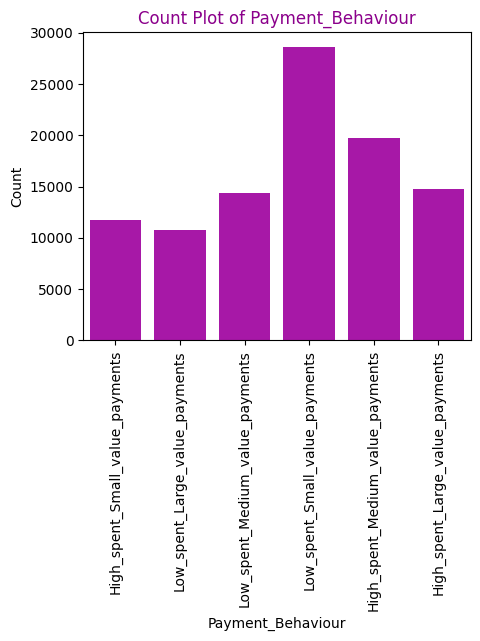

In [7]:
# count plot for 5 categorical features

def count_plot(column_name, color, title_color):
    plt.figure(figsize=(5, 4))
    sns.countplot(x=column_name, data=data, color=color)
    plt.title(f'Count Plot of {column_name}', color=title_color)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=90)   # Rotate x-axis labels for better readability
    plt.show()


count_plot('Credit_Score', 'g', 'darkgreen')
count_plot('Occupation', 'b', 'darkblue')
count_plot('Credit_Mix', 'r', 'darkred')
count_plot('Payment_of_Min_Amount', 'c', 'darkcyan')
count_plot('Payment_Behaviour', 'm', 'darkmagenta')

####**Heatmap**

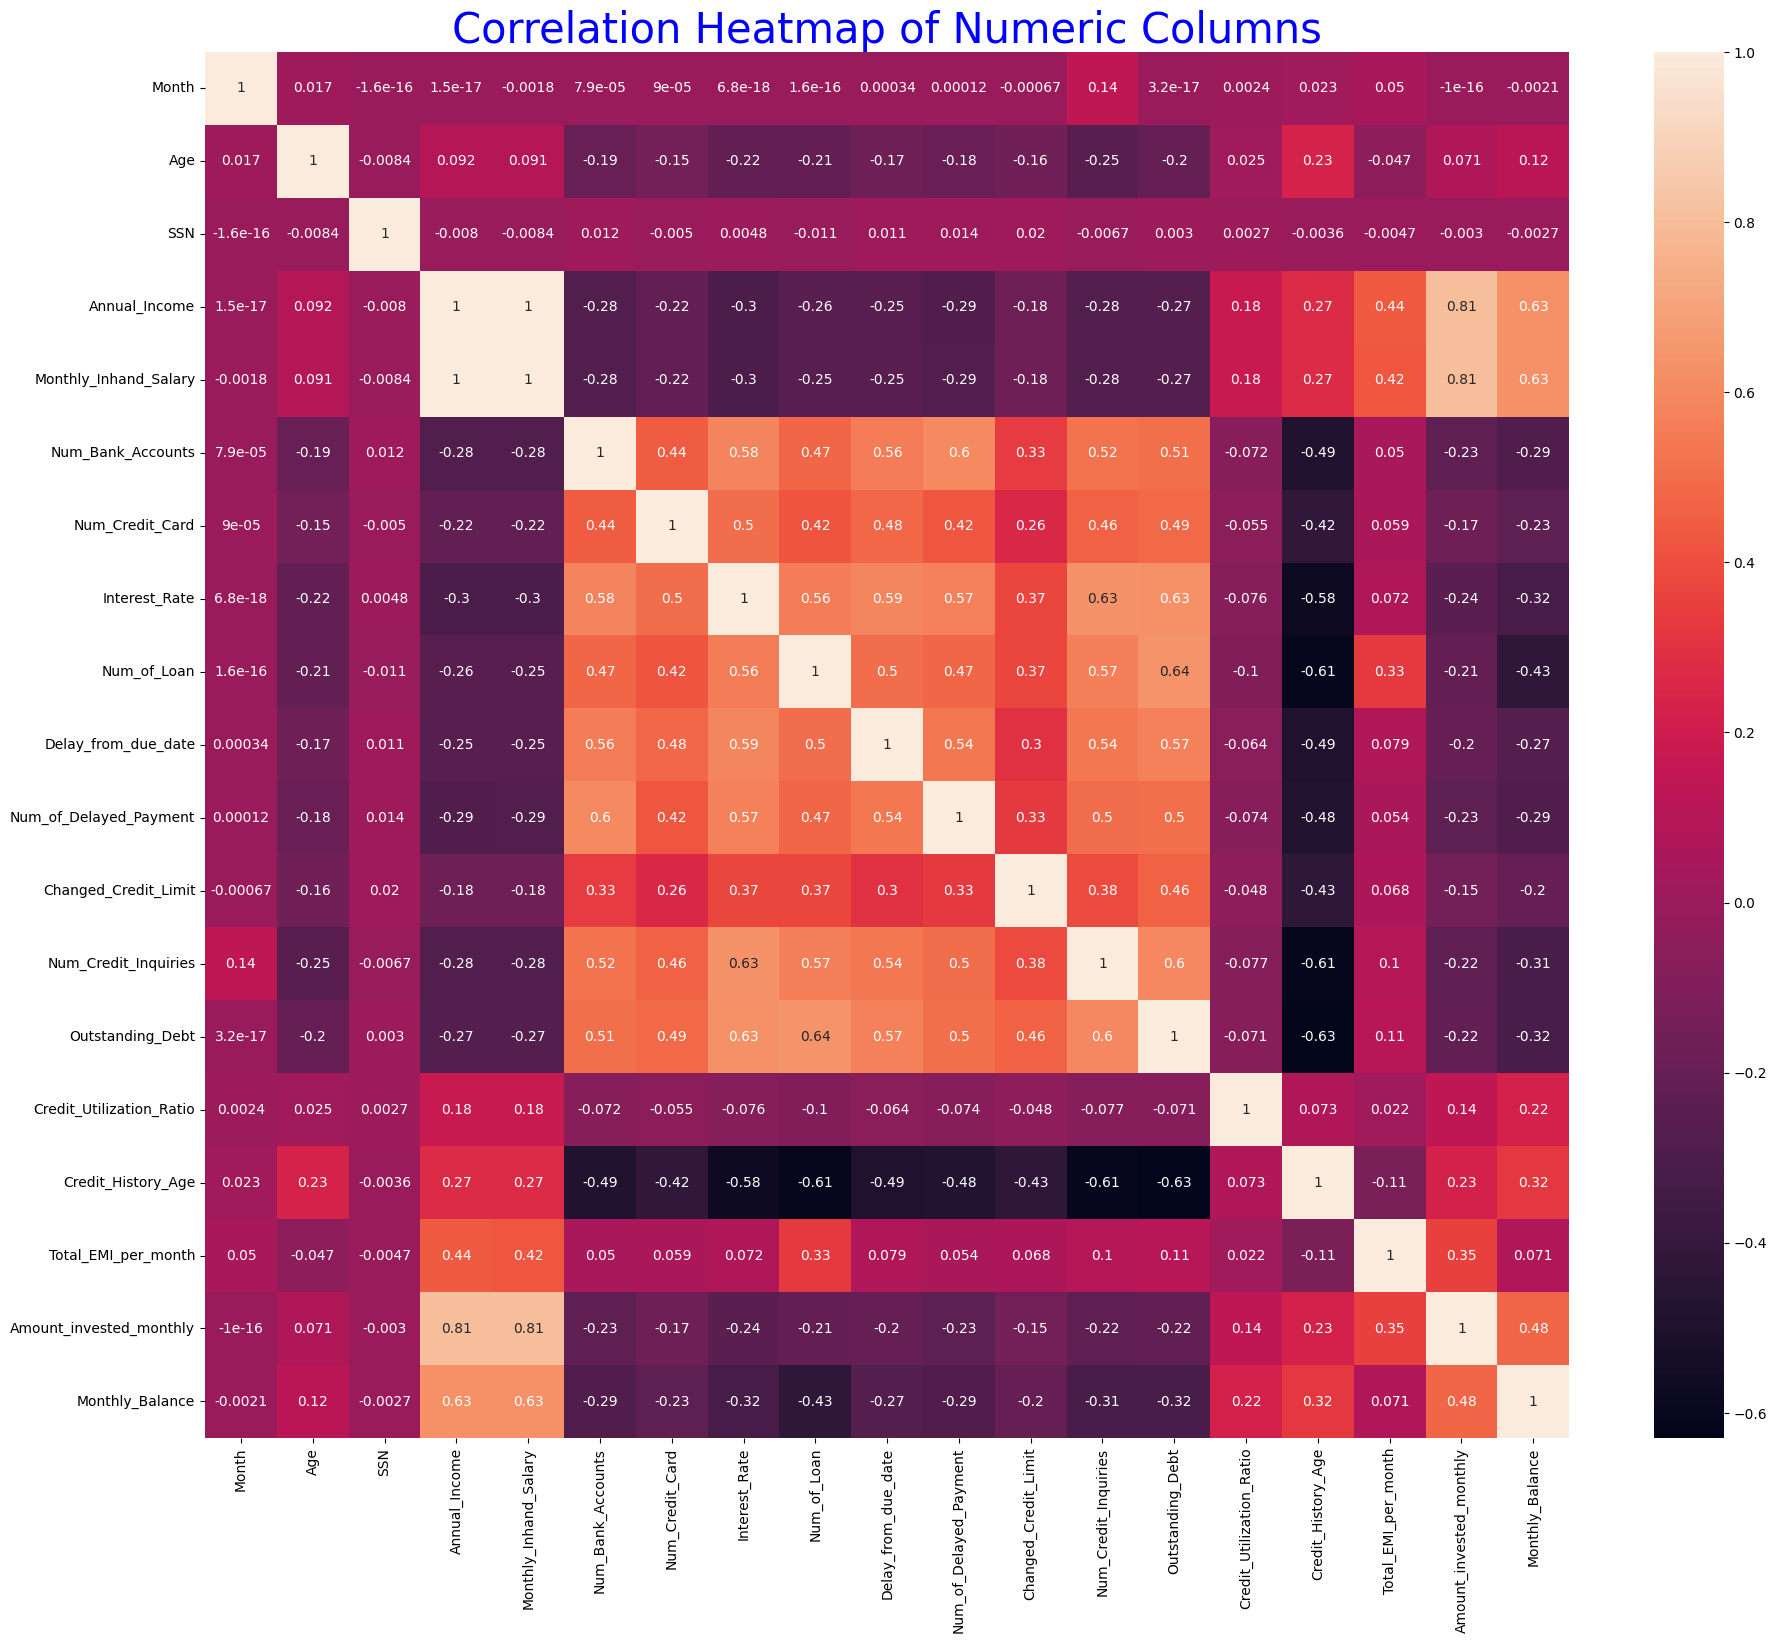

In [8]:

num_columns = data.select_dtypes(include=['number']).drop(['ID', 'Customer_ID'], axis=1).columns

plt.figure(figsize=(22,18))
sns.heatmap(data[num_columns].corr(),annot=True)
plt.title('Correlation Heatmap of Numeric Columns',color='blue',fontsize=30);


####**Lineplot**

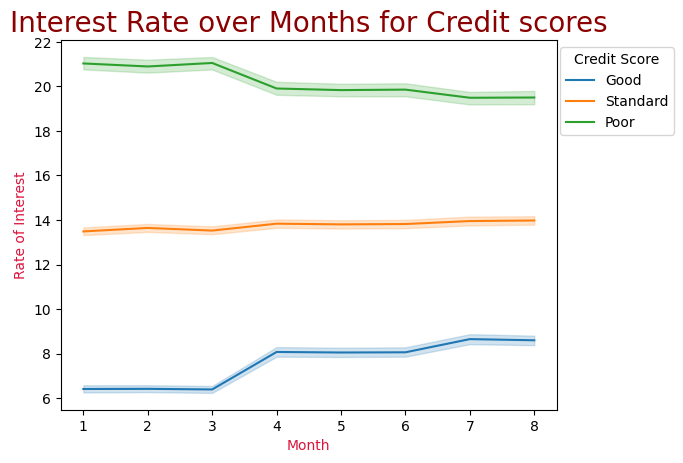

In [9]:
sns.lineplot(x='Month',y='Interest_Rate',hue='Credit_Score',data=data,palette='tab10')

plt.legend(loc='upper right',title='Credit Score',bbox_to_anchor=(1.25,1))
plt.title('Interest Rate over Months for Credit scores',color='darkred',fontsize=20)
plt.xlabel("Month",color='crimson')
plt.ylabel("Rate of Interest",color='crimson');

####**KDE Plot**

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

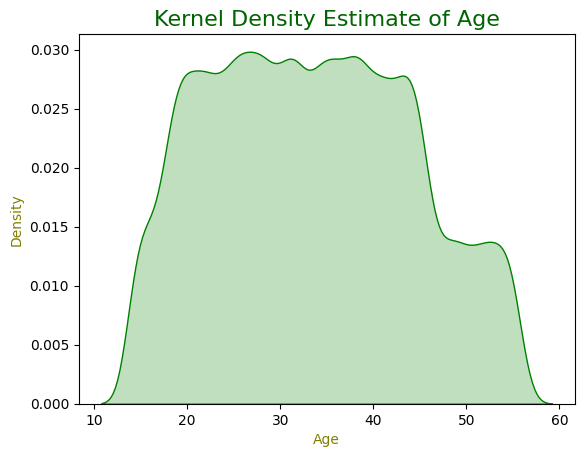

In [10]:
sns.kdeplot(data['Age'],color='g',fill=True)
plt.title('Kernel Density Estimate of Age', fontsize=16, color='darkgreen')
plt.xlabel('Age',color='olive')
plt.ylabel('Density',color='olive');

####**Bar Plot**

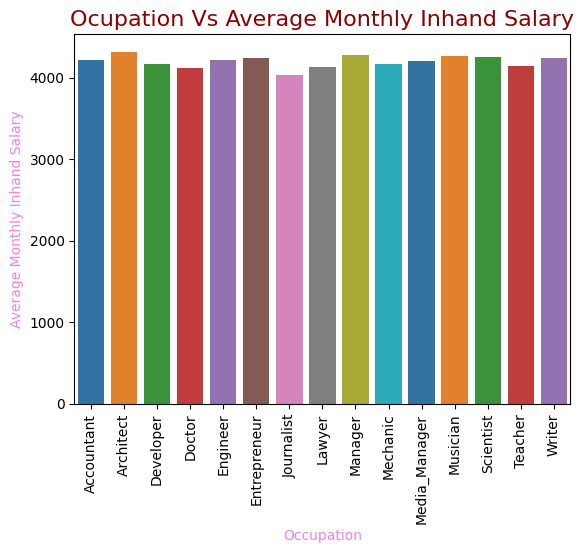

In [11]:
avg_salary = data.groupby('Occupation')['Monthly_Inhand_Salary'].mean().reset_index()


# plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Monthly_Inhand_Salary', hue='Occupation',data=avg_salary, palette='tab10')

plt.title("Ocupation Vs Average Monthly Inhand Salary",fontsize=16,color='darkred')
plt.xlabel("Occupation",color='violet')
plt.ylabel("Average Monthly Inhand Salary",color='violet')
plt.xticks(rotation=90);

####**RegPlot**

Regplot is used for creating scatter plots with regression lines fit to the data. This makes it a powerful tool for visualizing the relationship between two variables and examining if there is a linear relationship between them.

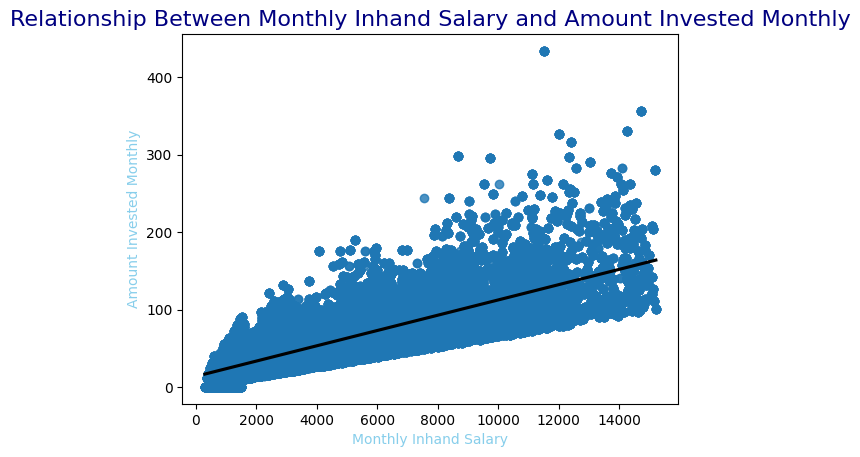

In [12]:
sns.regplot(data=data,x='Monthly_Inhand_Salary',y='Amount_invested_monthly', line_kws=dict(color="black"))

plt.title("Relationship Between Monthly Inhand Salary and Amount Invested Monthly",fontsize=16,color='navy')
plt.xlabel("Monthly Inhand Salary",color='skyblue')
plt.ylabel("Amount Invested Monthly",color='skyblue');

####**Pie Chart**

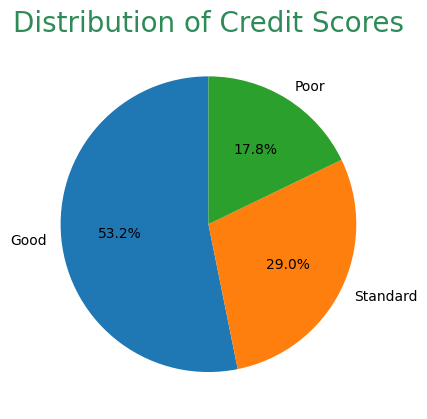

In [13]:

plt.pie(data['Credit_Score'].value_counts(), labels=data['Credit_Score'].unique(), autopct='%2.1f%%', startangle=90)
plt.title('Distribution of Credit Scores',color='seagreen',fontsize=20)
plt.show()


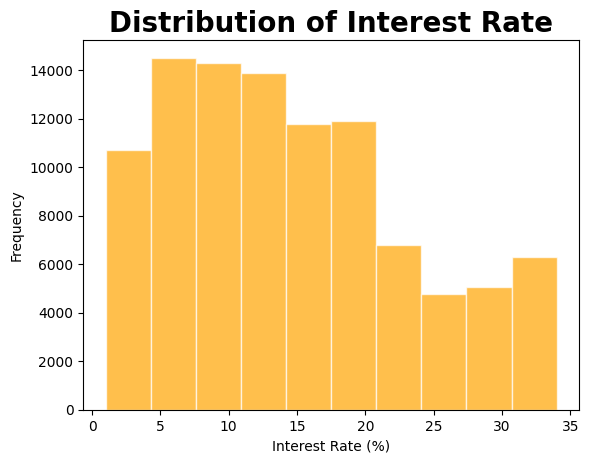

In [14]:
plt.hist(data['Interest_Rate'], color='orange',edgecolor='white', alpha=0.7)
plt.title('Distribution of Interest Rate',fontsize=20,fontweight='bold')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

#**Preprocessing of the Data**

####**Remove Unnecessary Features**

In [15]:
data.drop(['ID','Customer_ID'],axis=1,inplace=True)

**Why we are dropping these features**

1. Features like 'ID' or 'Customer_ID' often contain unique identifiers for
each in the dataset. These identifiers do not contribute to the analysis or modeling process .

2. Removing unnecessary columns helps reduce the dimensionality of the dataset.





In [16]:
data.shape
# Now the features get reduced to 26

(100000, 26)

####**Check for missing values**

In [17]:
data.isna().sum()

Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**There is no missing values in the dataset.**

##**Outliers**

An Outlier is a data point in a dataset that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

**To Identify Outliers**

1. IQR Method: Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile.

2. Z-Score Method: Data points that falls outside of 3 standard deviations. We can use a z-score and if the z-score falls outside of 2 standard deviations

**Various ways of finding the outliers**

1. Scatter plot
2. Boxplot
3. Using IQR Method
4. Using Z-Score Method

##**Boxplot**

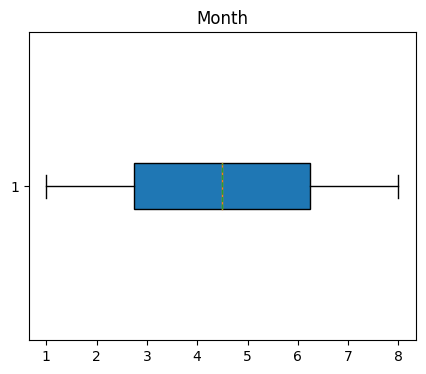

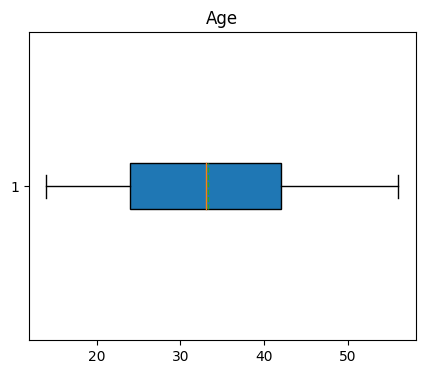

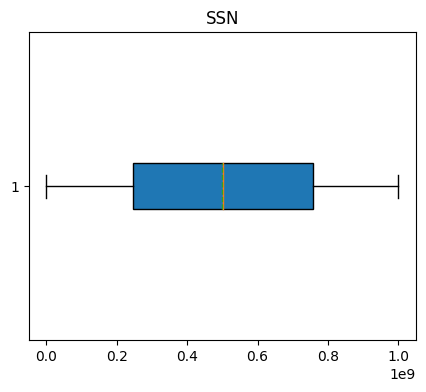

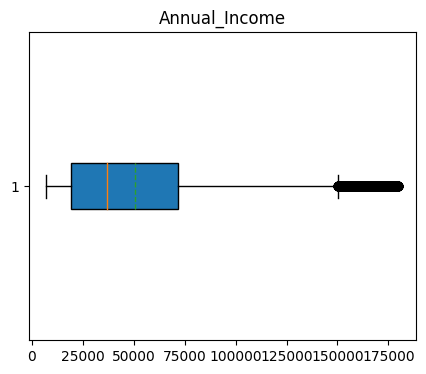

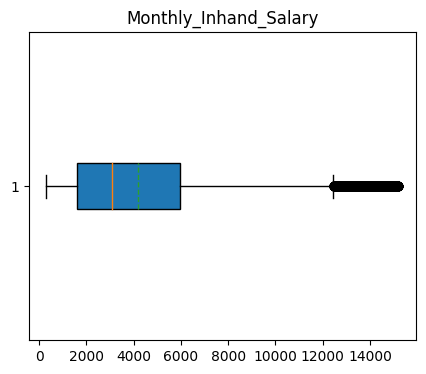

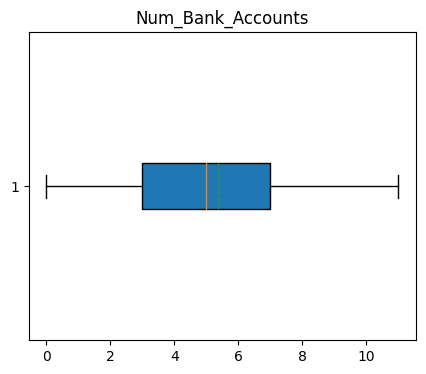

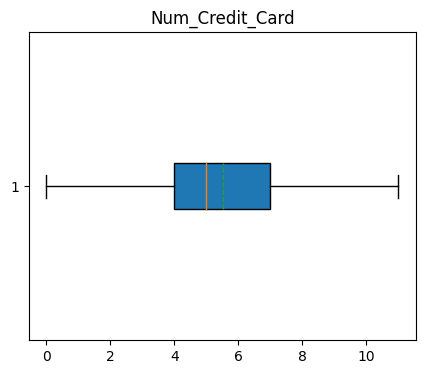

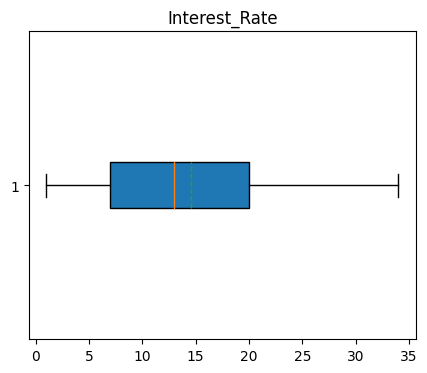

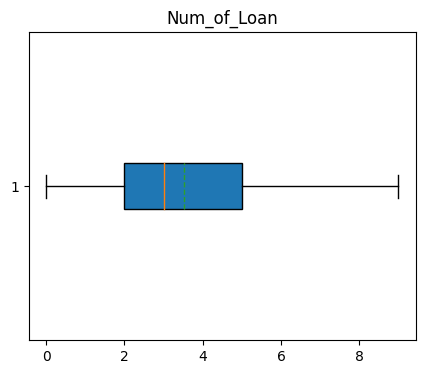

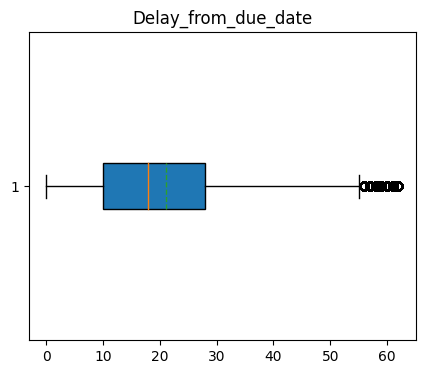

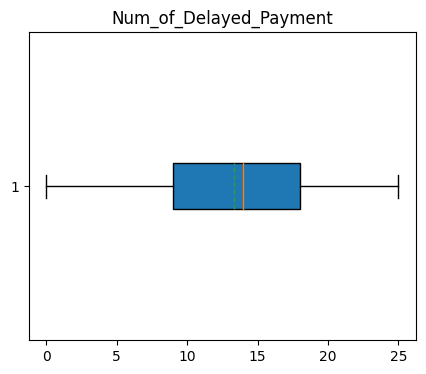

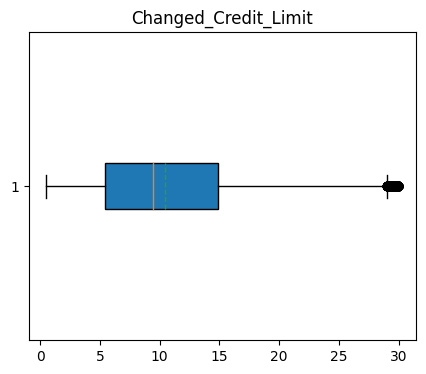

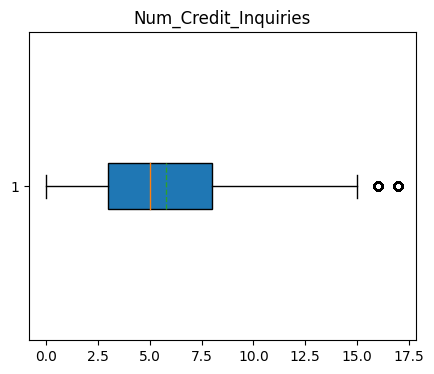

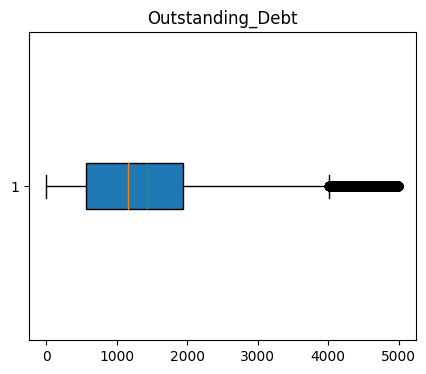

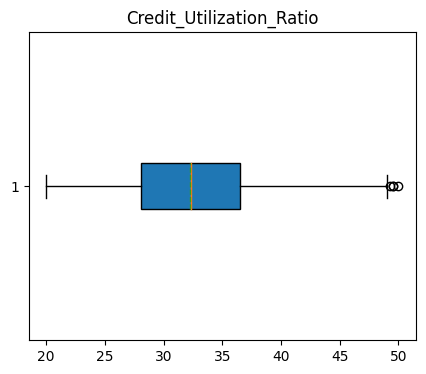

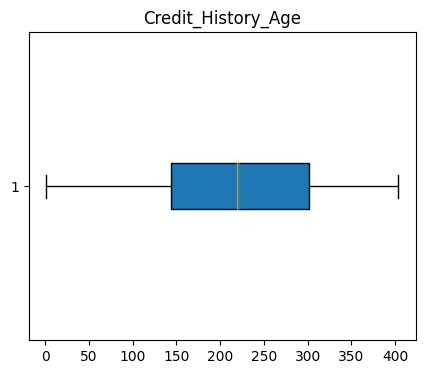

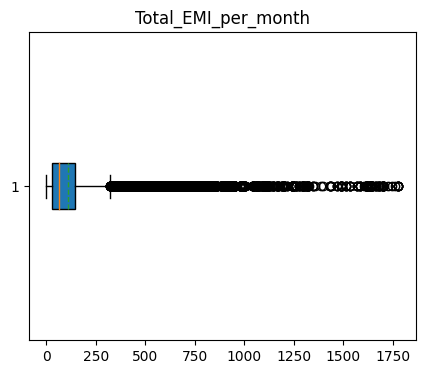

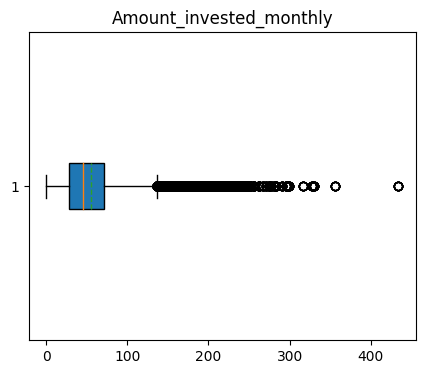

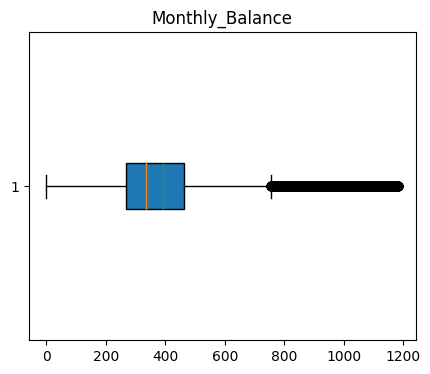

In [18]:
num_columns = data.select_dtypes(include=['number']).columns

for i in num_columns:
  plt.figure(figsize=(5,4))
  plt.boxplot(data[i],patch_artist=True,vert=False,
              showmeans=True,meanline=True,showfliers=True)  # Red line in the figure shows mean and green line shows the median
  plt.title(i)


###**Create a copy of the original datset to perform operations**

In [19]:
data1=data.copy()
data1.shape

(100000, 26)

###**Check for Outliers**

In [20]:
# creating a table to display the quantiles, IQR, outliers, etc.

# Create a dictionary to store the results
results = {
    'Column': [],'Q3': [],'Q1': [],'IQR': [],'Upper': [],'Lower': [],'Outliers': [],'Number of Outliers': [] }


# Create a for loop for all numerical columns
for i in num_columns:
  Q1 = np.percentile(data1[i],25,method='midpoint')
  Q3 = np.percentile(data1[i],75,method='midpoint')
  IQR =Q3 - Q1

  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR

  outliers = [x for x in data1[i] if x > upper or x < lower]

  # Append the results to the dictionary
  results['Column'].append(i)
  results['Q3'].append(Q3)
  results['Q1'].append(Q1)
  results['IQR'].append(IQR)
  results['Upper'].append(upper )
  results['Lower'].append(lower)
  results['Outliers'].append(outliers)
  results['Number of Outliers'].append(len(outliers))

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

pd.set_option('display.float_format', lambda x: '%.2f' % x)     # Display float values with 2 decimal places,
                                                                # otherwise it will show with scientific notation 'e'

# Display the DataFrame
results_df




,Column,Q3,Q1,IQR,Upper,Lower,Outliers,Number of Outliers
0,Month,6.50,2.50,4.00,12.50,-3.50,[],0
1,Age,42.00,24.00,18.00,69.00,-3.00,[],0
2,SSN,756009168.50,245159604.50,510849564.00,1522283514.50,-521114741.50,[],0
3,Annual_Income,71685.54,19341.68,52343.86,150201.34,-59174.12,"[173196.32, 173196.32, 173196.32, 173196.32, 1...",2000
4,Monthly_Inhand_Salary,5957.72,1626.59,4331.12,12454.40,-4870.09,"[14258.026666666668, 14258.026666666668, 14258...",2017
5,Num_Bank_Accounts,7.00,3.00,4.00,13.00,-3.00,[],0
6,Num_Credit_Card,7.00,4.00,3.00,11.50,-0.50,[],0
7,Interest_Rate,20.00,7.00,13.00,39.50,-12.50,[],0
8,Num_of_Loan,5.00,2.00,3.00,9.50,-2.50,[],0
9,Delay_from_due_date,28.00,10.00,18.00,55.00,-17.00,"[61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61....",4002


From the table it is clear that out of 19 numeric columns, 10 features have outliers. So now check for skewness:
1. if skewed : Use IQR method
2. if normal : Use Z-Score Method

###**Check the skewness of the features**

In [21]:
for i in num_columns:
  print('\033[36m'+ i +'\033[0m' )
  print(data[i].skew(),'\n')

Month
0.0 

Age
0.15633755099160856 

SSN
-0.0001529441021795716 

Annual_Income
1.130222566741384 

Monthly_Inhand_Salary
1.1286896104040092 

Num_Bank_Accounts
-0.19001504208866618 

Num_Credit_Card
0.22580768382470084 

Interest_Rate
0.4962318996645298 

Num_of_Loan
0.44560852324073413 

Delay_from_due_date
0.9698402706723249 

Num_of_Delayed_Payment
-0.21447039342856647 

Changed_Credit_Limit
0.7083424268261724 

Num_Credit_Inquiries
0.40682536214725384 

Outstanding_Debt
1.2075361955699684 

Credit_Utilization_Ratio
0.02861652613497035 

Credit_History_Age
-0.04883166412470526 

Total_EMI_per_month
4.041492244076896 

Amount_invested_monthly
1.7610362306626115 

Monthly_Balance
1.3556137797479813 



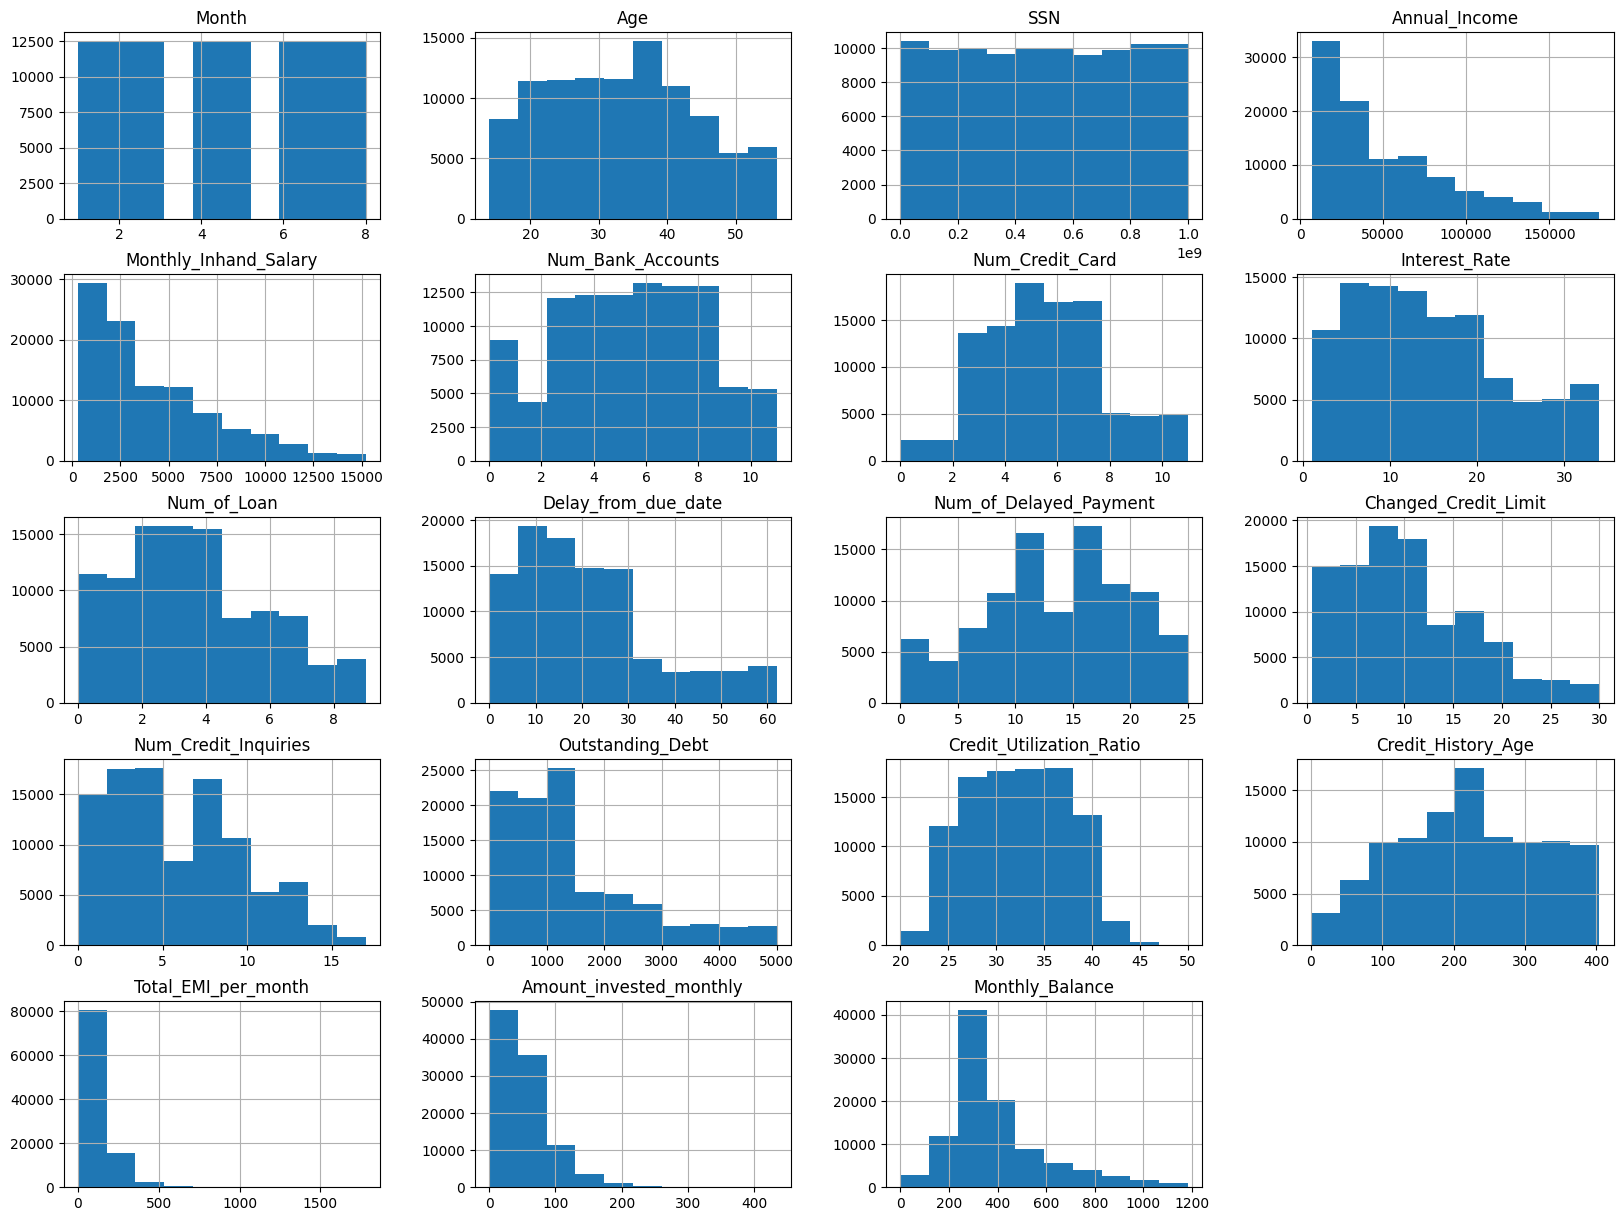

In [22]:
# to check the skewness

freq=data.select_dtypes(include=('float64','int64'))
freq.hist(figsize=(20,15));


Here, features are skewed so we can use IQR Method to handle outliers.

In [23]:
# HANDLING OUTLIERS WITH CLIP FUNCTION

for i in num_columns:

  #Calculating the interquartile range
  Q1 = np.percentile(data1[i],25,method='midpoint')
  Q3 = np.percentile(data1[i],75,method='midpoint')
  IQR =Q3 - Q1

  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR

  #Finding outliers
  outliers =[]
  for x in data1[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)

# upper values and lower values are replaced by upper limit and lower limit (respectively)by using clip function
  data1[i] = data1[i].clip(lower=low_lim ,upper=up_lim)

###**Check if the outliers are handled properly**

In [24]:
# Create a dictionary to store the results
results = {
    'Column': [],'Outliers': [],'Number of Outliers': [] }


# Create a for loop for all numerical columns
for i in num_columns:

  Q1 = np.percentile(data1[i],25,method='midpoint')
  Q3 = np.percentile(data1[i],75,method='midpoint')
  IQR = Q3 - Q1

  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR

  outliers = [x for x in data1[i] if x > upper or x < lower]

  # Append the results to the dictionary
  results['Column'].append(i)
  results['Outliers'].append(outliers)
  results['Number of Outliers'].append(len(outliers))

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Column,Outliers,Number of Outliers
0,Month,[],0
1,Age,[],0
2,SSN,[],0
3,Annual_Income,[],0
4,Monthly_Inhand_Salary,[],0
5,Num_Bank_Accounts,[],0
6,Num_Credit_Card,[],0
7,Interest_Rate,[],0
8,Num_of_Loan,[],0
9,Delay_from_due_date,[],0


In [25]:
data1.shape

(100000, 26)

##**Encoding**

Encoding refers to the process of transforming categorical data into a numerical format that machine learning algorithms can process effectively.

Common Encoding Methods are:
1. One Hot Encoding
2. Label Encoding

In [26]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ch_columns=['Name','Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

for i in ch_columns:
    data1[i]=le.fit_transform(data1[i])

In [27]:
data1.head()

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,11,23.00,821000265.00,12,19114.12,1824.84,3.00,4.00,3.00,...,1,809.98,26.82,265.00,1,49.57,21.47,2,312.49,0
1,2,11,23.00,821000265.00,12,19114.12,1824.84,3.00,4.00,3.00,...,1,809.98,31.94,266.00,1,49.57,21.47,3,284.63,0
2,3,11,23.00,821000265.00,12,19114.12,1824.84,3.00,4.00,3.00,...,1,809.98,28.61,267.00,1,49.57,21.47,4,331.21,0
3,4,11,23.00,821000265.00,12,19114.12,1824.84,3.00,4.00,3.00,...,1,809.98,31.38,268.00,1,49.57,21.47,5,223.45,0
4,5,11,23.00,821000265.00,12,19114.12,1824.84,3.00,4.00,3.00,...,1,809.98,24.80,269.00,1,49.57,21.47,1,341.49,0


##**Data Split**

In [28]:
from sklearn.model_selection import train_test_split

# Split data into independent features (X) and target (y)
X = data1.drop('Credit_Score',axis=1)
y =data1['Credit_Score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [29]:
# Print the sizes of each set

print(f"Training set: {len(X_train)}")
print(f"Testing set: {len(X_test)}")

Training set: 75000
Testing set: 25000


##**Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
# Now the preprocessed dataset 'data1'  is scaled and named as data_scaled.

scaled=sc.fit_transform(X)
X_sc=pd.DataFrame(scaled)
X_sc

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.53,-1.74,-0.96,1.10,1.17,-0.83,-0.75,-0.91,-0.74,-1.32,...,-0.47,-0.27,-0.54,-1.07,0.44,-0.58,-0.53,-0.95,-0.41,-0.40
1,-1.09,-1.74,-0.96,1.10,1.17,-0.83,-0.75,-0.91,-0.74,-1.32,...,-0.47,-0.27,-0.54,-0.07,0.45,-0.58,-0.53,-0.95,0.13,-0.56
2,-0.65,-1.74,-0.96,1.10,1.17,-0.83,-0.75,-0.91,-0.74,-1.32,...,-0.47,-0.27,-0.54,-0.72,0.46,-0.58,-0.53,-0.95,0.67,-0.29
3,-0.22,-1.74,-0.96,1.10,1.17,-0.83,-0.75,-0.91,-0.74,-1.32,...,-0.47,-0.27,-0.54,-0.18,0.47,-0.58,-0.53,-0.95,1.20,-0.92
4,0.22,-1.74,-0.96,1.10,1.17,-0.83,-0.75,-0.91,-0.74,-1.32,...,-0.47,-0.27,-0.54,-1.46,0.48,-0.58,-0.53,-0.95,-0.95,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.22,0.49,-0.77,-1.45,0.48,-0.28,-0.26,-0.53,0.23,-0.86,...,-0.73,-0.27,-0.83,0.46,1.57,-0.58,-0.69,-0.87,-1.48,0.57
99996,0.22,0.49,-0.77,-1.45,0.48,-0.28,-0.26,-0.53,0.23,-0.86,...,-0.73,-0.27,-0.83,1.62,1.58,-0.58,-0.69,-0.87,-0.95,0.67
99997,0.65,0.49,-0.77,-1.45,0.48,-0.28,-0.26,-0.53,0.23,-0.86,...,-0.73,-0.27,-0.83,1.75,1.59,-0.58,-0.69,-0.87,-1.48,0.79
99998,1.09,0.49,-0.77,-1.45,0.48,-0.28,-0.26,-0.53,0.23,-0.86,...,-0.73,-0.27,-0.83,0.26,1.60,-0.58,-0.69,-0.87,0.13,-0.36


##**Data Split with scaled data**

In [32]:
# Split data into training and test sets with scaled data

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.25, random_state=42)


In [33]:
# Further split training data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Training set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")

Training set: 56250
Validation set: 18750
